In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from patsy import dmatrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from time import time
from datetime import datetime as dt
plt.rc('font', family='SimHei', size=14) # 中文显示必须
%matplotlib inline
ipos = pd.read_csv(r'C:\Users\Administrator\Desktop\ipo_data.csv',encoding = 'GBK')
ipos.columns

Index(['日期', '发行者', '代码', '主承销', '发行价', '开盘价', '首日收盘价', '首日价变化比例', '开/发价比',
       '收/发价比', '评级', '成交'],
      dtype='object')

In [26]:
# 去除数据框中的$和%号
ipos = ipos.applymap(lambda x: x if not '$' in str(x) else x.replace('$',''))
ipos = ipos.applymap(lambda x: x if not '%' in str(x) else x.replace('%',''))
# ipos.info()

ipos.replace('N/C', 0, inplace= True)
ipos['日期'] = pd.to_datetime(ipos['日期']) # 进行日期格式的转换

# 进行数据类型转换
ipos['发行价'] = ipos['发行价'].astype('float')
ipos['开盘价'] = ipos['开盘价'].astype('float')
ipos['首日收盘价'] = ipos['首日收盘价'].astype('float')
ipos['首日价变化比例'] = ipos['首日价变化比例'].astype('float')
ipos['开/发价比'] = ipos['开/发价比'].astype('float')
ipos['收/发价比'] = ipos['收/发价比'].astype('float')
ipos['评级'] = ipos['评级'].astype('int')

# ipos.loc[1660, '日期']

ipos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2872 entries, 0 to 2871
Data columns (total 12 columns):
日期         2872 non-null datetime64[ns]
发行者        2872 non-null object
代码         2872 non-null object
主承销        2872 non-null object
发行价        2872 non-null float64
开盘价        2872 non-null float64
首日收盘价      2872 non-null float64
首日价变化比例    2872 non-null float64
开/发价比      2872 non-null float64
收/发价比      2872 non-null float64
评级         2872 non-null int32
成交         331 non-null object
dtypes: datetime64[ns](1), float64(6), int32(1), object(4)
memory usage: 213.2+ KB


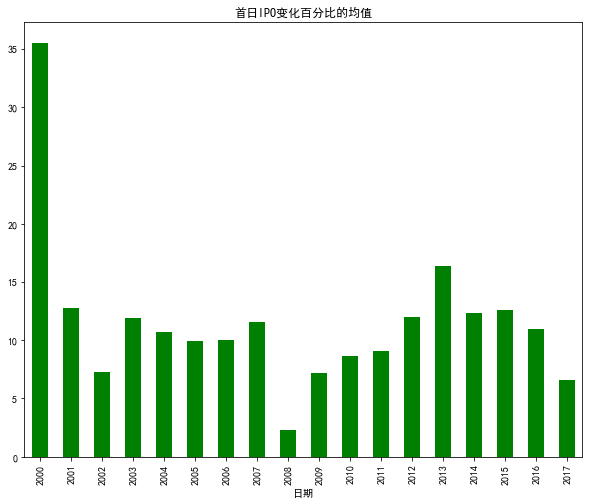

In [27]:
ipos.groupby(ipos['日期'].dt.year)['首日价变化比例'].mean().plot(kind = 'bar', figsize = (10, 8), color = 'green', title = '首日IPO变化百分比的均值')

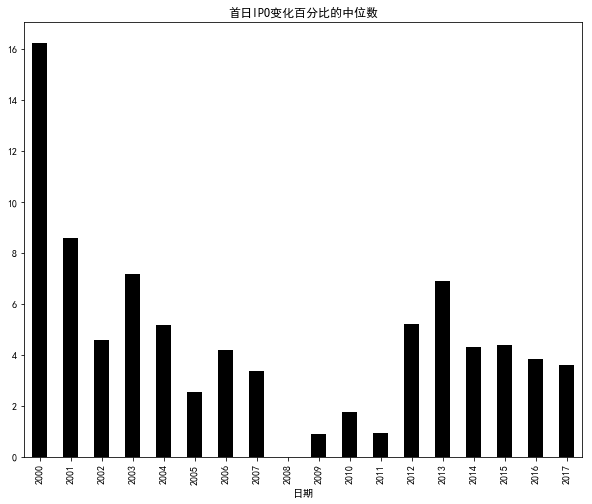

In [28]:
ipos.groupby(ipos['日期'].dt.year)['首日价变化比例'].median().plot(kind = 'bar', figsize = (10, 8), color = 'black', title = '首日IPO变化百分比的中位数')

In [29]:
ipos['首日价变化比例'].describe()

count    2872.000000
mean       12.969505
std        27.441652
min       -35.220000
25%         0.000000
50%         4.510000
75%        18.750000
max       353.850000
Name: 首日价变化比例, dtype: float64

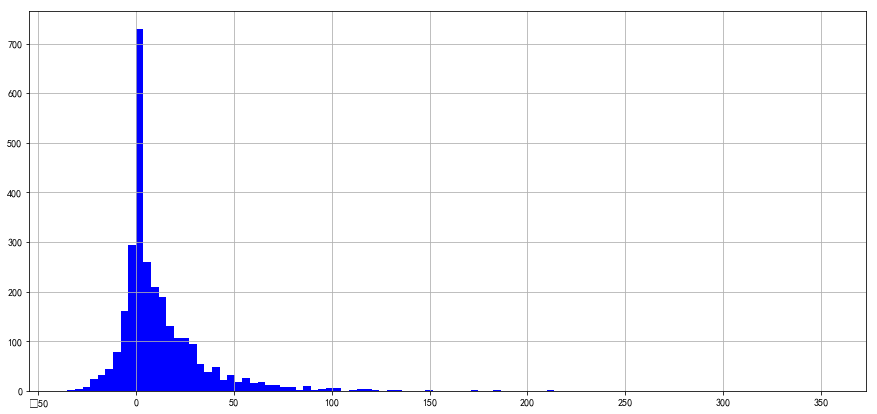

In [35]:
ipos['首日价变化比例'].hist(figsize = (15, 7), bins = 100, color = 'blue')

In [42]:
ipos['开/收价比'] = ipos['首日收盘价'] - ipos['开盘价']
ipos['开/收价比'] = (ipos['开/收价比']/ipos['开盘价']) * 100
ipos

,日期,发行者,代码,主承销,发行价,开盘价,首日收盘价,首日价变化比例,开/发价比,收/发价比,评级,成交,开/收价比,开/收价比例
0,2017-01-13,Gores Holdings II,GSHTU,Deutsche Bank Securities,10.00,10.16,10.25,2.50,0.16,0.25,1,NaN,0.885827,0.885827
1,2017-01-20,FinTech Acquisition Corp. II,FNTEU,Cantor Fitzgerald & Co.,10.00,10.10,10.05,0.50,0.10,0.05,1,NaN,-0.495050,-0.495050
2,2017-01-20,Keane Group,FRAC,Citigroup/ Morgan Stanley/ BofA Merrill Lynch/...,19.00,22.18,21.65,13.95,3.18,2.65,3,NaN,-2.389540,-2.389540
3,2017-01-26,AnaptysBio,ANAB,Credit Suisse/ Stifel,15.00,16.00,17.00,13.33,1.00,2.00,2,NaN,6.250000,6.250000
4,2017-01-26,ObsEva SA,OBSV,Credit Suisse/ Jefferies/ Leerink Partners,15.00,13.29,11.65,-22.33,-1.71,-3.35,2,Missed,-12.340105,-12.340105
5,2017-01-27,Jagged Peak Energy,JAG,Citigroup/ Credit Suisse/ J.P. Morgan,15.00,14.18,14.33,-4.47,-0.82,-0.67,1,NaN,1.057828,1.057828
6,2017-01-27,JELD-WEN Holding,JELD,Barclays/ Citigroup/ Credit Suisse/ J.P. Morgan,23.00,25.32,26.12,13.57,2.32,3.12,3,NaN,3.159558,3.159558
7,2017-01-27,Jounce Therapeutics,JNCE,J.P. Morgan/ Cowen and Company,16.00,18.00,17.25,7.81,2.00,1.25,2,NaN,-4.166667,-4.166667
8,2017-01-27,REV Group,REVG,Goldman Sachs/ Morgan Stanley/ Baird,22.00,25.75,25.00,13.64,3.75,3.00,2,NaN,-2.912621,-2.912621
9,2017-02-01,Invitation Homes,INVH,Deutsche Bank Securities/ J.P. Morgan/ BofA Me...,20.00,20.15,20.00,0.00,0.15,0.00,2,Missed,-0.744417,-0.744417


Index(['日期', '发行者', '代码', '主承销', '发行价', '开盘价', '首日收盘价', '首日价变化比例', '开/发价比',
       '收/发价比', '评级', '成交'],
      dtype='object')

In [40]:
ipos['开/收价比'].describe()

count    2872.000000
mean        1.327213
std        10.691302
min       -49.281222
25%        -2.828884
50%         0.000000
75%         4.026009
max       159.417476
Name: 开/收价比, dtype: float64

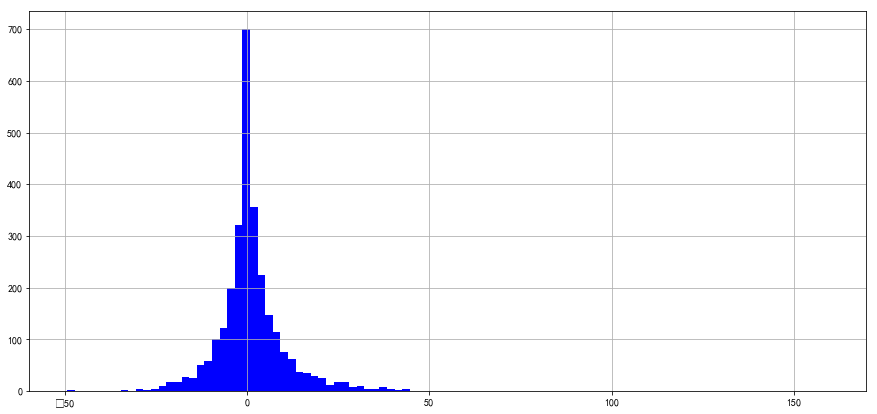

In [41]:
ipos['开/收价比'].hist(figsize = (15, 7), bins = 100, color = 'blue')

In [52]:
# 如果我们在开盘价购入所有IPO股票，那么最终得益情况如下。
ipos[ipos['日期']>='2015-01-01']['开/收价比'].describe()

count    353.000000
mean       0.878674
std       12.874905
min      -28.729963
25%       -3.344209
50%        0.000000
75%        3.159558
max      159.417476
Name: 开/收价比, dtype: float64

In [48]:
ipos[ipos['日期']>='2015-01-01']['开/收价比'].sum()

310.17181626528441

In [50]:
ipos[(ipos['日期'] >= '2015-01-01') & (ipos['开/收价比'] > 0)]['开/收价比'].describe()

count    166.000000
mean       7.697040
std       15.039435
min        0.066667
25%        1.088589
50%        3.475079
75%        7.863077
max      159.417476
Name: 开/收价比, dtype: float64

In [51]:
ipos[(ipos['日期'] >= '2015-01-01') & (ipos['开/收价比'] < 0)]['开/收价比'].describe()

count    165.000000
mean      -5.863859
std        5.943147
min      -28.729963
25%       -8.285714
50%       -3.956044
75%       -1.510177
max       -0.040000
Name: 开/收价比, dtype: float64

ModuleNotFoundError: No module named 'lxml'